In [ ]:
"""point de vue, on veut augmenter les aides aux personnes ayant un revenu bas"""

Description
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
| Description of fnlwgt (final weight)
|
| The weights on the CPS files are controlled to independent estimates of the
| civilian noninstitutional population of the US. These are prepared monthly
| for us by Population Division here at the Census Bureau. We use 3 sets of
| controls.
| These are:
| 1. A single cell estimate of the population 16+ for each state.
| 2. Controls for Hispanic Origin by age and sex.
| 3. Controls by Race, age and sex.
|
| We use all three sets of controls in our weighting program and "rake" through
| them 6 times so that by the end we come back to all the controls we used.
|
| The term estimate refers to population totals derived from CPS by creating
| "weighted tallies" of any specified socio-economic characteristics of the
| population.
|
| People with similar demographic characteristics should have
| similar weights. There is one important caveat to remember
| about this statement. That is that since the CPS sample is
| actually a collection of 51 state samples, each with its own
| probability of selection, the statement only applies within
| state.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
to_dummies=[]
to_drop=[]

In [6]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Column Income

In [48]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
#Income is the target column. We ill try to predict whether the revenue is higher or o

In [50]:
# create new column with 1 if income is higher than 50K and 0 if lower or equal to 50K
dct={'<=50K':0,'>50K':1}

In [51]:

df['Income_new']=df.income.map(dct)

### Column Age

In [5]:
df.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

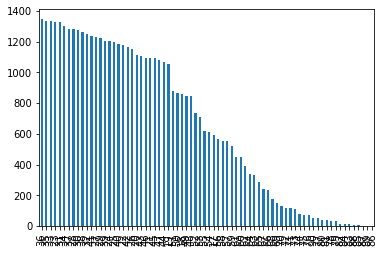

In [44]:
df.age.value_counts().plot(kind='bar')

In [ ]:
"""Categories global?"""

### Column workclass

In [10]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df.workclass=df.workclass.str.replace('?','Unknown')

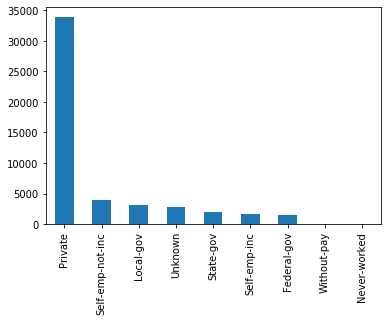

In [18]:
df.workclass.value_counts().plot(kind='bar')

In [21]:
df.workclass.unique()

array(['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

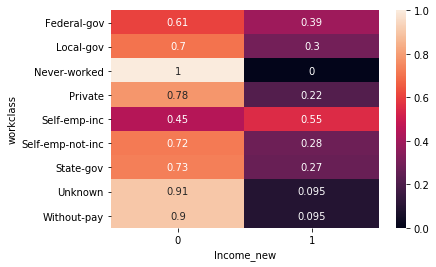

In [110]:
sns.heatmap(pd.crosstab(df.workclass,df.Income_new,normalize='index'),annot=True)
#workclass has an impact on Income. For the model we could keep all values however we will gather government related classes
#together, Private, self emp inc and self emp not inc alone, without pay and never worked together.

In [31]:
dct_workclass={'Without-pay':'No_income','Never-worked':'No_income','State-gov':'gov_related_income','Federal-gov':'gov_related_income','Local-gov':'gov_related_income','Private':'Private','Unknown':'Unknown','Self-emp-not-inc':'Self-emp-not-inc','Self-emp-inc':'Self-emp-inc'}

In [32]:
df['New_workclass']=df.workclass.map(dct_workclass)

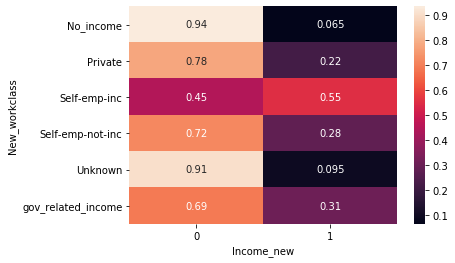

In [109]:
sns.heatmap(pd.crosstab(df.New_workclass,df.Income_new,normalize='index'),annot=True)

In [36]:
#put it to dummies. Cannot rank them it as I do not know the d
to_dummies.append('New_workclass')

In [108]:
#strange cases in workclass to study later
df[df.workclass=='Without-pay'].Income_new
df.iloc[8903]
df.iloc[10647]

age                                50
workclass                 Without-pay
fnlwgt                         123004
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation          Machine-op-inspct
relationship                Own-child
race                            White
gender                         Female
capital-gain                        0
capital-loss                     1887
hours-per-week                     40
native-country          United-States
income                           >50K
New_workclass               No_income
Income_new                          1
Capital                         -1887
Name: 10647, dtype: object

### Column fnlwgt

In [41]:
#Too many unique values to be used as it is for the modeling. May give us an idea of whether the sampling is correct. 
df.fnlwgt.nunique()

28523

In [42]:
# too many unique values
to_drop.append('fnlwgt')

### Columns Capital

In [54]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [55]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

In [56]:
#Merge Capital Gain and capital Loss in 1 column.
df['Capital']=df['capital-gain']-df['capital-loss']

### Columns Native country

In [ ]:
df['native-country'].nunique()

In [114]:
df['native-country'].value_counts()


#Mainly a US data. The other country data may not be significant vs. US. ==> study on us only

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

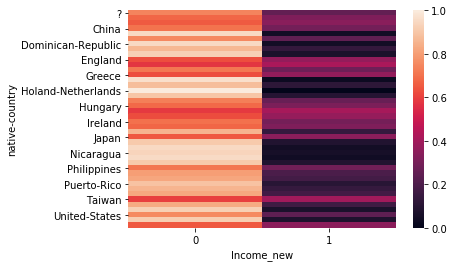

In [105]:
sns.heatmap(pd.crosstab(df['native-country'],df.Income_new,normalize='index'))
#Too many values to conclude

In [117]:
df['native-country']=df['native-country'].str.replace('?','Unknown')

In [118]:
pd.crosstab(df['native-country'],df.Income_new,normalize='index').round(2)

Income_new,0,1
native-country,,
Cambodia,0.68,0.32
Canada,0.65,0.35
China,0.70,0.30
Columbia,0.95,0.05
Cuba,0.75,0.25
Dominican-Republic,0.95,0.05
Ecuador,0.87,0.13
El-Salvador,0.93,0.07
England,0.63,0.37


In [122]:
dct_country={
'United-States': 'US',
'Mexico':'Mexico',
'Unknown':'Unknown',
'Philippines':'Philippines',
'Germany':'Europe',
'Puerto-Rico':'Caraibes',
'Canada':'Canada',
'El-Salvador':'South-America',
'India':'India',
'Cuba':'Cuba',
'England':'Europe',
'China':'China',
'South':'Other',
'Jamaica':'Caraibes',
'Italy' :'Europe',
'Dominican-Republic ':'Caraibes',
'Japan':'Asia',
"Guatemala":'South-America',
'Poland':'Europe',
'Vietnam':'Asia',
'Columbia' :'Other',
'Haiti':'Caraibes', 
'Portugal':'Europe',
'Taiwan':'Asia',
'Iran':'Other',
'Greece':'Europe', 
'Nicaragua':'South-America',
'Peru':'South-America',
'Ecuador':'South-America',
'France':'Europe',
'Ireland':'Europe',
'Thailand':'Asia',
'Hong': 'Asia',
'Cambodia':'Asia',
'Trinadad&Tobago':'Caraibes',
'Outlying-US(Guam-USVI-etc)':'Other',
'Laos':'Asia',
'Yugoslavia':'Europe',
'Scotland':'Europe',
'Honduras':'South-America',
'Hungary':'Europe', 
'Holand-Netherlands':'Europe',
}

In [123]:
# keep only the United states related  rows
df['NativeC']=df['native-country'].map(dct_country)

In [124]:
df['NativeC'].value_counts()

US               43832
Mexico             951
Unknown            857
Europe             780
South-America      403
Caraibes           392
Asia               354
Philippines        295
Other              282
Canada             182
India              151
Cuba               138
China              122
Name: NativeC, dtype: int64

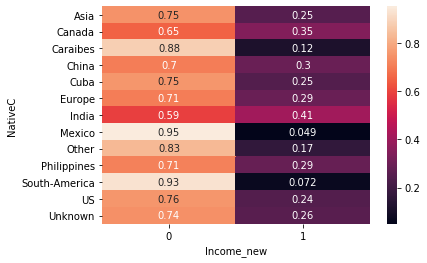

In [126]:
sns.heatmap(pd.crosstab(df['NativeC'],df.Income_new,normalize='index'),annot=True)

In [127]:
to_dummies.append('NativeC')

### Columns marital-status and relationship

In [132]:
df['marital-status'].value_counts()
#being in a relationship may influence the way you accept or not job evolution/opportunities . May not need details like spouse civ or in the Army Force.

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [79]:
dct_status={
'Married-civ-spouse':'Married',
'Never-married': 'Single',
'Divorced': 'Divorced',
'Separated':'Single',
'Widowed'  :'Single',
'Married-spouse-absent':'Married',
'Married-AF-spouse':'Married'
}


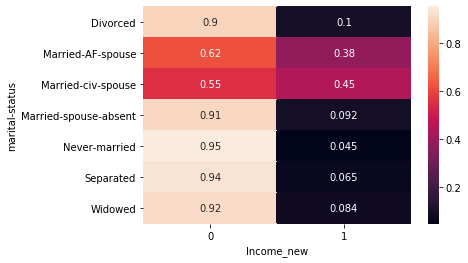

In [106]:
sns.heatmap(pd.crosstab(df['marital-status'],df.Income_new,normalize='index'),annot=True)
#marital status seems to have an impact on the target so I keep it. 
#I will study two models one with all sub categories and one with Married (same home) and not married or separated home
#

In [137]:
df['Marital_status_new']=df['marital-status'].map(dct_status)

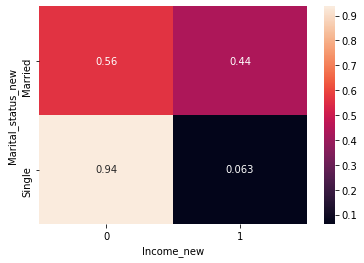

In [138]:
sns.heatmap(pd.crosstab(df['Marital_status_new'],df.Income_new,normalize='index'),annot=True)

In [72]:
#relationship to be checked with marital-status
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

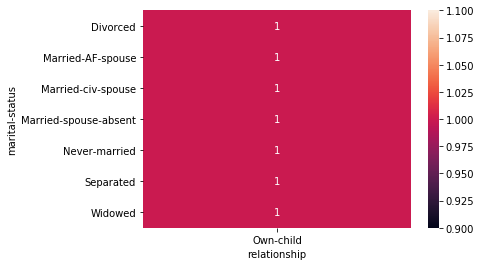

In [141]:
"""To do correlation between marital status and  relationship"""

In [82]:
#if we keep Marital status , we may not need relationship as it does not bring much more information. TBC
to_drop.append('relationship')

### Column hours-per-week

In [63]:
df['hours-per-week'].unique()
#There may be people which have to work. 
"""Find how to handle this columns. Range??? Maybe two work"""

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

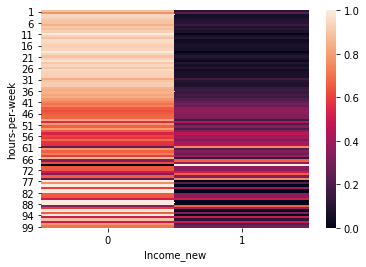

In [130]:
sns.heatmap(pd.crosstab(df['hours-per-week'],df.Income_new,normalize='index'))


In [ ]:
sns.heatmap(pd.crosstab(df['hours-per-week'],df.Income_new,normalize='index'))

In [66]:
df['hours-per-week'].nunique()

96

### Column Gender

In [136]:
df.gender.value_counts()


Male      32650
Female    16192
Name: gender, dtype: int64

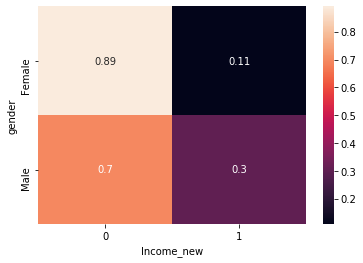

In [143]:
sns.heatmap(pd.crosstab(df['gender'],df.Income_new,normalize='index'),annot=True)

In [69]:
to_dummies.append('gender')

### Column Race

In [70]:

df.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

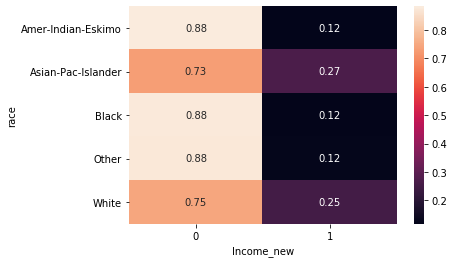

In [144]:
sns.heatmap(pd.crosstab(df['race'],df.Income_new,normalize='index'),annot=True)

In [71]:
to_dummies.append('race')

### Columns Education and Education-num

In [148]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [149]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
# I keep df['educational-num'] which is already ranked


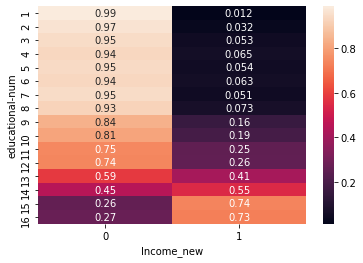

In [155]:
sns.heatmap(pd.crosstab(df['educational-num'],df.Income_new,normalize='index'),annot=True)
# Clearly the higher level of education reach the higher you are likely to have an income higher than 50%



### Column Occupation

In [153]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [157]:
df['occupation']=df['occupation'].str.replace('?','Unknown')

In [158]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

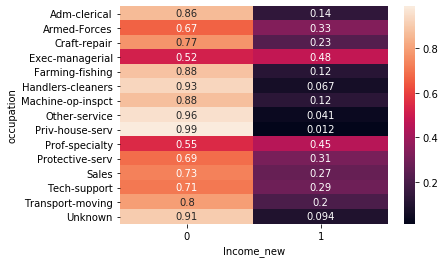

In [159]:
sns.heatmap(pd.crosstab(df['occupation'],df.Income_new,normalize='index'),annot=True)

In [160]:
to_dummies.append('occupation')

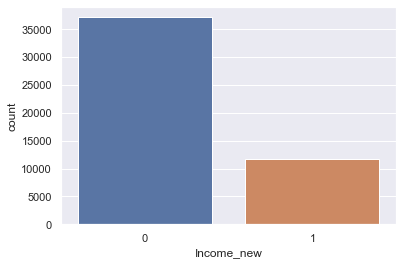

In [166]:
sns.countplot(df.Income_new)
#binomial distribution

In [171]:
to_drop=list(set(to_drop))
to_drop

['relationship', 'fnlwgt']

In [173]:
df1=df.drop(to_drop,axis=1)

In [175]:
df1.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'New_workclass',
       'Income_new', 'Capital', 'NativeC', 'Marital_status_new'],
      dtype='object')

In [200]:
df2=df1[['age', 'educational-num','occupation', 'race', 'gender','hours-per-week','New_workclass',
       'Income_new','Capital', 'NativeC', 'Marital_status_new']]
df2

,age,educational-num,occupation,race,gender,hours-per-week,New_workclass,Income_new,Capital,NativeC,Marital_status_new
0,25,7,Machine-op-inspct,Black,Male,40,Private,0,0,US,Single
1,38,9,Farming-fishing,White,Male,50,Private,0,0,US,Married
2,28,12,Protective-serv,White,Male,40,gov_related_income,1,0,US,Married
3,44,10,Machine-op-inspct,Black,Male,40,Private,1,7688,US,Married
4,18,10,Unknown,White,Female,30,Unknown,0,0,US,Single
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,Tech-support,White,Female,38,Private,0,0,US,Married
48838,40,9,Machine-op-inspct,White,Male,40,Private,1,0,US,Married
48839,58,9,Adm-clerical,White,Female,40,Private,0,0,US,Single
48840,22,9,Adm-clerical,White,Male,20,Private,0,0,US,Single


In [201]:
to_dummies.extend(['age','hours-per-week','Marital_status_new'])


['New_workclass',
 'gender',
 'race',
 'NativeC',
 'occupation',
 'age',
 'hours-per-week',
 'Marital_status_new',
 'age',
 'hours-per-week',
 'Marital_status_new',
 'age',
 'hours-per-week',
 'Marital_status_new']

In [205]:
to_dummies=list(set(to_dummies))
to_dummies

['occupation',
 'New_workclass',
 'gender',
 'age',
 'NativeC',
 'race',
 'hours-per-week',
 'Marital_status_new']

In [206]:
df3=pd.get_dummies(data=df2, columns=to_dummies,drop_first=True)

In [207]:
df3.shape

(48842, 208)

In [208]:
df3.head()

,educational-num,Income_new,Capital,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,...,hours-per-week_90,hours-per-week_91,hours-per-week_92,hours-per-week_94,hours-per-week_95,hours-per-week_96,hours-per-week_97,hours-per-week_98,hours-per-week_99,Marital_status_new_Single
0,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,1,7688,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Modelling

In [222]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [244]:
# Lanceur de models
model_list=[LogisticRegression,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,SVC,AdaBoostClassifier,CatBoostClassifier]

#Ecrire uen classe abvec les modeles
def LaunchAllModels(model_list):
    results=[]
    for i in model_list:
        model=eval(f'{i}()')
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        conf=confusion_matrix(y_test,y_pred)
        print(f'Model{i}')
        display(conf)
        acc=accuracy_score(y_test,y_pred)
        rec=recall_score(y_test,y_pred)
        pr=precision_score(y_test,y_pred)
        f1=f1_score(y_test,y_pred)
        print(f'acc: {acc},pr:{pr},rec:{rec},f1:{f1}')
        results.append([i,acc,rec,pr,f1])
    return results
                    

In [ ]:
#from xgboost import XGBClassifier
#could not be loaded
""" verifier comment faire pour mac"""

In [209]:
# splitting  dataset into train and test for all models except Logistic regression and SVM and Gaussian Naive Bayes
X_train, X_test,y_train,y_test = train_test_split(df2.drop('Income_new',axis=1), \
                                                  df.Income_new, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=df.Income_new)

In [210]:
# splitting  dataset into train and test for Logistic regression and SVM (no categorical) and Gaussian Naive Bayes
X1_train, X1_test,y1_train,y1_test = train_test_split(df3.drop('Income_new',axis=1), \
                                                  df3.Income_new, \
                                                  test_size=1/3, \
                                                  random_state=42, \
                                                  stratify=df3.Income_new)

### Logistic Regression

In [216]:
# need numeric data 'calcul of distance'
model1=LogisticRegression(max_iter=1e8)
model1.fit(X1_train,y1_train)
y_pred1=model1.predict(X1_test)
conf1=confusion_matrix(y1_test,y_pred1)
display(conf1)
acc1=accuracy_score(y1_test,y_pred1)
rec1=recall_score(y1_test,y_pred1)
pr1=precision_score(y1_test,y_pred1)
f11=f1_score(y1_test,y_pred1)
print(f'acc1: {acc1},pr1:{pr1},rec1:{rec1},f11:{f11}')

array([[11544,   841],
       [ 1615,  2281]])

acc1: 0.8491493151526319,pr1:0.730621396540679,rec1:0.5854722792607803,f11:0.6500427472214306


Confusion Matrix


$$\begin{bmatrix} True Positive & False Negative \\ False Positive & True Negative \end{bmatrix}$$

Definition of the Terms:

##### Positive (P) : Observation is positive (for example: is an apple).
##### Negative (N) : Observation is not positive (for example: is not an apple).
##### True Positive (TP) : Observation is positive, and is predicted to be positive.
##### False Negative (FN) : Observation is positive, but is predicted negative.
##### True Negative (TN) : Observation is negative, and is predicted to be negative.
##### False Positive (FP) : Observation is negative, but is predicted positive.

$$accuracy = \frac{TN+TP}{TN+TP+FN+FP}$$

However, there are problems with accuracy. It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.

$$recall= \frac{TP}{TP+FN}$$
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN).

$$precision = \frac{TP}{TP+FP}$$
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)


$$f-measure = \frac{2*recall*precision}{recall+precision}$$
F-measure:
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
The F-Measure will always be nearer to the smaller value of Precision or Recall.

##### Test assumption for this model

### Logistic Regression balanced

In [219]:
# need numeric data 'calcul of distance'
model2=LogisticRegression(max_iter=1e8,class_weight='balanced')
model2.fit(X1_train,y1_train)
y_pred2=model2.predict(X1_test)
conf2=confusion_matrix(y1_test,y_pred2)
display(conf2)
acc2=accuracy_score(y1_test,y_pred2)
rec2=recall_score(y1_test,y_pred2)
pr2=precision_score(y1_test,y_pred2)
f12=f1_score(y1_test,y_pred2)
print(f'acc2: {acc2},pr2:{pr2},rec2:{rec2},f12:{f12}')

array([[9797, 2588],
       [ 624, 3272]])

acc2: 0.8027148209569437,pr2:0.5583617747440273,rec2:0.839835728952772,f12:0.6707667076670766


##### Test assumption for this model

###  Support Vector Machine

In [221]:
# need numeric data 'calcul of distance'
model3=SVC()
model3.fit(X1_train,y1_train)
y_pred3=model3.predict(X1_test)
conf3=confusion_matrix(y1_test,y_pred3)
display(conf3)
acc3=accuracy_score(y1_test,y_pred3)
rec3=recall_score(y1_test,y_pred3)
pr3=precision_score(y1_test,y_pred3)
f13=f1_score(y1_test,y_pred3)
print(f'acc3: {acc3},pr3:{pr3},rec3:{rec3},f13:{f13}')

array([[12003,   382],
       [ 2834,  1062]])

acc3: 0.8024691358024691,pr3:0.7354570637119113,rec3:0.27258726899383984,f13:0.39775280898876403


In [ ]:
##tester les kernel

##### Test assumption for this model

### Nu-Support Vector Machine

In [224]:
model4=NuSVC(nu=0.1)
model4.fit(X1_train,y1_train)
y_pred4=model4.predict(X1_test)
conf4=confusion_matrix(y1_test,y_pred4)
display(conf4)
acc4=accuracy_score(y1_test,y_pred4)
rec4=recall_score(y1_test,y_pred4)
pr4=precision_score(y1_test,y_pred4)
f14=f1_score(y1_test,y_pred4)
print(f'acc4: {acc4},pr4:{pr4},rec4:{rec4},f14:{f14}')

array([[  424, 11961],
       [  894,  3002]])

acc4: 0.21042933480744427,pr4:0.20062821626679142,rec4:0.7705338809034907,f14:0.3183625855029429


##### Test assumption for this model

## Gaussian Naive Bayes

In [226]:
model5=GaussianNB()
model5.fit(X1_train,y1_train)
y_pred5=model5.predict(X1_test)
conf5=confusion_matrix(y1_test,y_pred5)
display(conf5)
acc5=accuracy_score(y1_test,y_pred5)
rec5=recall_score(y1_test,y_pred5)
pr5=precision_score(y1_test,y_pred5)
f15=f1_score(y1_test,y_pred5)
print(f'acc5: {acc5},pr5:{pr5},rec5:{rec5},f15:{f15}')

array([[10590,  1795],
       [ 1113,  2783]])

acc5: 0.8213868926970088,pr5:0.607907383136741,rec5:0.7143223819301848,f15:0.6568326646211942


## Decision Trees

In [228]:
model6=DecisionTreeClassifier()
model6.fit(X1_train,y1_train)
y_pred6=model5.predict(X1_test)
conf6=confusion_matrix(y1_test,y_pred6)
display(conf6)
acc6=accuracy_score(y1_test,y_pred6)
rec6=recall_score(y1_test,y_pred6)
pr6=precision_score(y1_test,y_pred6)
f16=f1_score(y1_test,y_pred6)
print(f'acc6: {acc6},pr6:{pr6},rec6:{rec6},f16:{f16}')

array([[10590,  1795],
       [ 1113,  2783]])

acc6: 0.8213868926970088,pr6:0.607907383136741,rec6:0.7143223819301848,f16:0.6568326646211942


##### Test assumption for this model

## Random Forest

In [230]:
model7=RandomForestClassifier()
model7.fit(X1_train,y_train)
y_pred7=model7.predict(X1_test)
conf7=confusion_matrix(y1_test,y_pred7)
display(conf7)
acc7=accuracy_score(y1_test,y_pred7)
rec7=recall_score(y1_test,y_pred7)
pr7=precision_score(y1_test,y_pred7)
f17=f1_score(y1_test,y_pred7)
print(f'acc7: {acc7},pr7:{pr7},rec7:{rec7},f17:{f17}')

array([[11474,   911],
       [ 1559,  2337]])

acc7: 0.848289417111971,pr7:0.7195197044334976,rec7:0.5998459958932238,f17:0.6542553191489362


##### Test assumption for this model

## Random Forest balanced

In [232]:
model8=RandomForestClassifier(class_weight='balanced')
model8.fit(X1_train,y_train)
y_pred8=model8.predict(X1_test)
conf8=confusion_matrix(y1_test,y_pred8)
display(conf8)
acc8=accuracy_score(y1_test,y_pred8)
rec8=recall_score(y1_test,y_pred8)
pr8=precision_score(y1_test,y_pred8)
f18=f1_score(y1_test,y_pred8)
print(f'acc8: {acc8},pr8:{pr8},rec8:{rec8},f18:{f18}')

array([[11262,  1123],
       [ 1422,  2474]])

acc8: 0.8436828204655734,pr8:0.6877953850430915,rec8:0.6350102669404517,f18:0.6603496596823702


##### Test assumption for this model

## ADABOOST

In [234]:
model9=AdaBoostClassifier()
model9.fit(X1_train,y_train)
y_pred9=model9.predict(X1_test)
conf9=confusion_matrix(y1_test,y_pred9)
display(conf8)
acc9=accuracy_score(y1_test,y_pred9)
rec9=recall_score(y1_test,y_pred9)
pr9=precision_score(y1_test,y_pred9)
f19=f1_score(y1_test,y_pred9)
print(f'acc9: {acc9},pr9:{pr9},rec9:{rec9},f18:{f19}')

array([[11262,  1123],
       [ 1422,  2474]])

acc9: 0.8583625084454272,pr9:0.7567829457364341,rec9:0.6013860369609856,f18:0.6701945080091533


##### Test assumption for this model

## XGBOOST

In [ ]:
#model10=XGBClassifier()

##### Test assumption for this model

## K-Nearest Neighbors

In [235]:
model11=KNeighborsClassifier(n_neighbors=7)
model11.fit(X1_train,y_train)
y_pred11=model11.predict(X1_test)
conf11=confusion_matrix(y1_test,y_pred11)
display(conf11)
acc11=accuracy_score(y1_test,y_pred11)
rec11=recall_score(y1_test,y_pred11)
pr11=precision_score(y1_test,y_pred11)
f111=f1_score(y1_test,y_pred11)
print(f'acc11: {acc11},pr11:{pr11},rec11:{rec11},f18:{f111}')

array([[11465,   920],
       [ 1478,  2418]])

acc11: 0.8527117498925127,pr11:0.7243858597962852,rec11:0.6206365503080082,f18:0.6685098147636164


In [240]:
model12=KNeighborsClassifier(weights='distance')
model12.fit(X1_train,y_train)
y_pred12=model12.predict(X1_test)
conf12=confusion_matrix(y1_test,y_pred12)
display(conf12)
acc12=accuracy_score(y1_test,y_pred12)
rec12=recall_score(y1_test,y_pred12)
pr12=precision_score(y1_test,y_pred12)
f112=f1_score(y1_test,y_pred12)
print(f'acc12: {acc12},pr12:{pr12},rec11:{rec12},f18:{f112}')

array([[11346,  1039],
       [ 1494,  2402]])

acc12: 0.844419875928997,pr12:0.6980528916012787,rec11:0.61652977412731,f18:0.6547635273272454


##### Test assumption for this model

## Catboost

In [241]:
model13=CatBoostClassifier()
model13.fit(X1_train,y_train)
y_pred13=model13.predict(X1_test)
conf13=confusion_matrix(y1_test,y_pred13)
display(conf13)
acc13=accuracy_score(y1_test,y_pred13)
rec13=recall_score(y1_test,y_pred13)
pr13=precision_score(y1_test,y_pred13)
f113=f1_score(y1_test,y_pred13)
print(f'acc13: {acc13},pr13:{pr13},rec13:{rec13},f18:{f113}')

Learning rate set to 0.045589
0:	learn: 0.6484813	total: 123ms	remaining: 2m 3s
1:	learn: 0.6093168	total: 153ms	remaining: 1m 16s
2:	learn: 0.5746441	total: 194ms	remaining: 1m 4s
3:	learn: 0.5468121	total: 233ms	remaining: 58s
4:	learn: 0.5221926	total: 257ms	remaining: 51.1s
5:	learn: 0.5007160	total: 290ms	remaining: 48.1s
6:	learn: 0.4820976	total: 324ms	remaining: 45.9s
7:	learn: 0.4657281	total: 357ms	remaining: 44.3s
8:	learn: 0.4503488	total: 396ms	remaining: 43.6s
9:	learn: 0.4364144	total: 433ms	remaining: 42.9s
10:	learn: 0.4256822	total: 468ms	remaining: 42.1s
11:	learn: 0.4151650	total: 501ms	remaining: 41.2s
12:	learn: 0.4062651	total: 532ms	remaining: 40.4s
13:	learn: 0.3988068	total: 560ms	remaining: 39.5s
14:	learn: 0.3914389	total: 586ms	remaining: 38.5s
15:	learn: 0.3859292	total: 616ms	remaining: 37.9s
16:	learn: 0.3799221	total: 655ms	remaining: 37.8s
17:	learn: 0.3751730	total: 691ms	remaining: 37.7s
18:	learn: 0.3707214	total: 749ms	remaining: 38.7s
19:	learn: 0

165:	learn: 0.2987204	total: 5.73s	remaining: 28.8s
166:	learn: 0.2986209	total: 5.78s	remaining: 28.8s
167:	learn: 0.2985195	total: 5.81s	remaining: 28.8s
168:	learn: 0.2983090	total: 5.85s	remaining: 28.8s
169:	learn: 0.2981627	total: 5.88s	remaining: 28.7s
170:	learn: 0.2981093	total: 5.92s	remaining: 28.7s
171:	learn: 0.2980392	total: 5.97s	remaining: 28.8s
172:	learn: 0.2979456	total: 6.01s	remaining: 28.7s
173:	learn: 0.2978675	total: 6.05s	remaining: 28.7s
174:	learn: 0.2977702	total: 6.09s	remaining: 28.7s
175:	learn: 0.2976739	total: 6.13s	remaining: 28.7s
176:	learn: 0.2975653	total: 6.16s	remaining: 28.7s
177:	learn: 0.2974718	total: 6.21s	remaining: 28.7s
178:	learn: 0.2973293	total: 6.23s	remaining: 28.6s
179:	learn: 0.2971574	total: 6.26s	remaining: 28.5s
180:	learn: 0.2966839	total: 6.28s	remaining: 28.4s
181:	learn: 0.2965832	total: 6.31s	remaining: 28.4s
182:	learn: 0.2964628	total: 6.33s	remaining: 28.3s
183:	learn: 0.2963782	total: 6.36s	remaining: 28.2s
184:	learn: 

327:	learn: 0.2828797	total: 11.5s	remaining: 23.6s
328:	learn: 0.2828254	total: 11.6s	remaining: 23.6s
329:	learn: 0.2827500	total: 11.6s	remaining: 23.5s
330:	learn: 0.2824871	total: 11.6s	remaining: 23.5s
331:	learn: 0.2824244	total: 11.7s	remaining: 23.5s
332:	learn: 0.2823539	total: 11.7s	remaining: 23.4s
333:	learn: 0.2822849	total: 11.7s	remaining: 23.4s
334:	learn: 0.2822272	total: 11.8s	remaining: 23.4s
335:	learn: 0.2821767	total: 11.8s	remaining: 23.4s
336:	learn: 0.2821198	total: 11.9s	remaining: 23.5s
337:	learn: 0.2820552	total: 12.1s	remaining: 23.8s
338:	learn: 0.2819837	total: 12.2s	remaining: 23.8s
339:	learn: 0.2817685	total: 12.2s	remaining: 23.7s
340:	learn: 0.2817204	total: 12.3s	remaining: 23.7s
341:	learn: 0.2816590	total: 12.3s	remaining: 23.7s
342:	learn: 0.2815877	total: 12.4s	remaining: 23.7s
343:	learn: 0.2813344	total: 12.4s	remaining: 23.7s
344:	learn: 0.2813262	total: 12.5s	remaining: 23.7s
345:	learn: 0.2812574	total: 12.5s	remaining: 23.6s
346:	learn: 

489:	learn: 0.2711566	total: 16.9s	remaining: 17.6s
490:	learn: 0.2711193	total: 16.9s	remaining: 17.6s
491:	learn: 0.2710591	total: 17s	remaining: 17.5s
492:	learn: 0.2708265	total: 17s	remaining: 17.5s
493:	learn: 0.2707832	total: 17s	remaining: 17.5s
494:	learn: 0.2707141	total: 17.1s	remaining: 17.4s
495:	learn: 0.2706544	total: 17.1s	remaining: 17.4s
496:	learn: 0.2706120	total: 17.1s	remaining: 17.3s
497:	learn: 0.2705681	total: 17.2s	remaining: 17.3s
498:	learn: 0.2705237	total: 17.2s	remaining: 17.3s
499:	learn: 0.2704193	total: 17.2s	remaining: 17.2s
500:	learn: 0.2704055	total: 17.3s	remaining: 17.2s
501:	learn: 0.2703346	total: 17.3s	remaining: 17.1s
502:	learn: 0.2703019	total: 17.3s	remaining: 17.1s
503:	learn: 0.2702941	total: 17.3s	remaining: 17.1s
504:	learn: 0.2702590	total: 17.4s	remaining: 17s
505:	learn: 0.2702231	total: 17.4s	remaining: 17s
506:	learn: 0.2701750	total: 17.4s	remaining: 16.9s
507:	learn: 0.2701113	total: 17.5s	remaining: 16.9s
508:	learn: 0.2700744	

648:	learn: 0.2634630	total: 21.3s	remaining: 11.5s
649:	learn: 0.2633976	total: 21.4s	remaining: 11.5s
650:	learn: 0.2633545	total: 21.4s	remaining: 11.5s
651:	learn: 0.2633061	total: 21.4s	remaining: 11.4s
652:	learn: 0.2632389	total: 21.4s	remaining: 11.4s
653:	learn: 0.2631979	total: 21.4s	remaining: 11.3s
654:	learn: 0.2631544	total: 21.5s	remaining: 11.3s
655:	learn: 0.2631203	total: 21.5s	remaining: 11.3s
656:	learn: 0.2630953	total: 21.5s	remaining: 11.2s
657:	learn: 0.2630573	total: 21.5s	remaining: 11.2s
658:	learn: 0.2630144	total: 21.5s	remaining: 11.1s
659:	learn: 0.2629774	total: 21.6s	remaining: 11.1s
660:	learn: 0.2629402	total: 21.6s	remaining: 11.1s
661:	learn: 0.2628936	total: 21.6s	remaining: 11s
662:	learn: 0.2628568	total: 21.6s	remaining: 11s
663:	learn: 0.2627994	total: 21.6s	remaining: 11s
664:	learn: 0.2627555	total: 21.7s	remaining: 10.9s
665:	learn: 0.2627526	total: 21.7s	remaining: 10.9s
666:	learn: 0.2627189	total: 21.7s	remaining: 10.8s
667:	learn: 0.2627

811:	learn: 0.2565571	total: 25.3s	remaining: 5.85s
812:	learn: 0.2565139	total: 25.3s	remaining: 5.82s
813:	learn: 0.2564645	total: 25.3s	remaining: 5.78s
814:	learn: 0.2564564	total: 25.3s	remaining: 5.75s
815:	learn: 0.2564365	total: 25.4s	remaining: 5.72s
816:	learn: 0.2564042	total: 25.4s	remaining: 5.68s
817:	learn: 0.2563727	total: 25.4s	remaining: 5.65s
818:	learn: 0.2563653	total: 25.4s	remaining: 5.62s
819:	learn: 0.2563429	total: 25.4s	remaining: 5.58s
820:	learn: 0.2563194	total: 25.5s	remaining: 5.55s
821:	learn: 0.2563171	total: 25.5s	remaining: 5.52s
822:	learn: 0.2562916	total: 25.5s	remaining: 5.49s
823:	learn: 0.2562701	total: 25.5s	remaining: 5.45s
824:	learn: 0.2562334	total: 25.6s	remaining: 5.42s
825:	learn: 0.2562072	total: 25.6s	remaining: 5.39s
826:	learn: 0.2561636	total: 25.6s	remaining: 5.36s
827:	learn: 0.2561324	total: 25.6s	remaining: 5.32s
828:	learn: 0.2560816	total: 25.6s	remaining: 5.29s
829:	learn: 0.2560557	total: 25.7s	remaining: 5.26s
830:	learn: 

970:	learn: 0.2515663	total: 28.9s	remaining: 863ms
971:	learn: 0.2515282	total: 28.9s	remaining: 833ms
972:	learn: 0.2514782	total: 29s	remaining: 803ms
973:	learn: 0.2514394	total: 29s	remaining: 773ms
974:	learn: 0.2514125	total: 29s	remaining: 743ms
975:	learn: 0.2514019	total: 29s	remaining: 713ms
976:	learn: 0.2513787	total: 29s	remaining: 684ms
977:	learn: 0.2513491	total: 29.1s	remaining: 654ms
978:	learn: 0.2513244	total: 29.1s	remaining: 624ms
979:	learn: 0.2512812	total: 29.1s	remaining: 594ms
980:	learn: 0.2512511	total: 29.1s	remaining: 564ms
981:	learn: 0.2512380	total: 29.1s	remaining: 534ms
982:	learn: 0.2512141	total: 29.2s	remaining: 504ms
983:	learn: 0.2511992	total: 29.2s	remaining: 475ms
984:	learn: 0.2511620	total: 29.2s	remaining: 445ms
985:	learn: 0.2511503	total: 29.2s	remaining: 415ms
986:	learn: 0.2511438	total: 29.2s	remaining: 385ms
987:	learn: 0.2511164	total: 29.3s	remaining: 355ms
988:	learn: 0.2510921	total: 29.3s	remaining: 326ms
989:	learn: 0.2510523	

array([[11725,   660],
       [ 1420,  2476]])

acc13: 0.8722437196732388,pr13:0.7895408163265306,rec13:0.635523613963039,f18:0.7042093287827076


##### Test assumption for this model

# MODEL COMPARISON

In [242]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [ ]:
model_roc1=roc_auc_score(y_test, y_pred7)
fpr1,tpr1,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])

model_roc2=roc_auc_score(y_test, y_pred10)
fpr2,tpr2,thresholds2=roc_curve(y_test, model10.predict_proba(X_test)[:,1])

model_roc3=roc_auc_score(y_test, y_pred11)
fpr3,tpr3,thresholds3=roc_curve(y_test, model11.predict_proba(X_test)[:,1])

model_roc4=roc_auc_score(y_test, [eval(i) for i in y_pred13])
fpr4,tpr4,thresholds4=roc_curve(y_test, model13.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr1,tpr1, label=f'Random Forest with area={model_roc1.round(2)}')
plt.plot(fpr2,tpr2, label=f'XGBoost with area={model_roc2.round(2)}')
plt.plot(fpr3,tpr3, label=f'KNeighbors with area={model_roc3.round(2)}')
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc4.round(2)}')

plt.plot([0,1],[0,1])
plt.legend()
plt.show()